## Assignment 1: Machine Learning Methods

### \<Miaomiao Wang> \<a1832767>

#### How can we use data analytics to predict energy usage for this house?

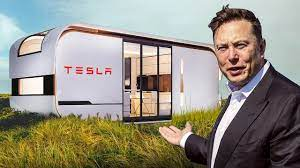


### 1. Read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
data=pd.read_csv("energydata_complete-1.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#checking shape of dataset
data.shape

(19735, 29)

In [4]:
#checking info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
# checking for null values
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
# Check the basic information of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


### 2. Analyse and visualise the data

In this assignment, we present our findings from analyzing a dataset. Our first step was to check for missing values and perform basic processing of the data.

To gain a better understanding of the relationship between variables, we generated scatter plots of all variables against the target variable. From this, we found no clear linear relationship between variables. Additionally, histograms revealed the presence of some outliers in the data.

To assess the correlation between features, we generated a heatmap. This visualization showed weak correlations between features, indicating that there may be complex non-linear relationships at play. Based on this observation, we chose to consider non-linear regression models for modeling the data.

We selected Random Forest regression and Gradient Boosting regrssion models to handle the complex non-linear relationships within the data. Additionally, we used a ridge linear regression model for comparison purposes.

Overall, our analysis suggests that the dataset exhibits complex non-linear relationships between features. By choosing appropriate non-linear regression models, we can better capture these relationships and produce more accurate predictions.



In [7]:
# Finding Categorical Values and Numerical Values
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['date']


In [8]:
numerical = [var_1 for var_1 in data.columns if data[var_1].dtype=='int64'or'float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 29 numerical variables

The numerical variables are :

 ['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


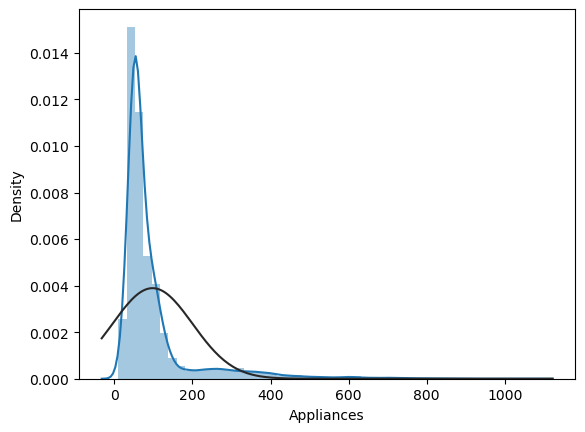

In [9]:
# Let us first visualize the spread of Target Variable 'Appliances'
from scipy.stats import norm
sns.distplot(data['Appliances'], fit=norm)
plt.show()

### Observation:
The Target Variable Appliances distribution is not normally distributed, it is a little positively skewed with some high energy use.

In [10]:
# copy dataset
new_data = data.copy()
new_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [11]:
#converting date into datetime
new_data['date'] = new_data['date'].astype('datetime64[ns]')
new_data['Date'] = pd.to_datetime(new_data['date']).dt.date
new_data['Time'] = pd.to_datetime(new_data['date']).dt.time
new_data['hour'] = new_data['date'].dt.hour
new_data['month'] = new_data['date'].dt.month
new_data= new_data.drop(["date"], axis=1)
new_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date,Time,hour,month
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00,17,1
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00,17,1
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00,17,1
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00,17,1
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00,17,5
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00,17,5
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00,17,5
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00,17,5


In [12]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [13]:
# rename columns
col_names = ['date', 'Appliances', 'lights', 'kitchen_temp', 'kitchen_hum', 'living_temp', 'living_hum','laundry_temp'
             ,'laundry_hum', 'office_temp', 'office_hum', 'bath_temp', 'bath_hum', 'out_b_temp','out_b_hum','iron_temp',
            'iron_hum','teen_temp','teen_hum','par_temp','par_hum','out_temp','Press_mm_hg','out_hum','Windspeed',
             'Visibility', 'Tdewpoint', 'rv1', 'rv2']
data.columns = col_names
data.columns

Index(['date', 'Appliances', 'lights', 'kitchen_temp', 'kitchen_hum',
       'living_temp', 'living_hum', 'laundry_temp', 'laundry_hum',
       'office_temp', 'office_hum', 'bath_temp', 'bath_hum', 'out_b_temp',
       'out_b_hum', 'iron_temp', 'iron_hum', 'teen_temp', 'teen_hum',
       'par_temp', 'par_hum', 'out_temp', 'Press_mm_hg', 'out_hum',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Data visualization

In [14]:
# Calculate the total energy consumed by the appliance per hour
app_hour = new_data.groupby(by='hour',as_index=False)['Appliances'].sum()
app_hour

,hour,Appliances
0,0,43390
1,1,42190
2,2,40340
3,3,39650
4,4,40570
5,5,43350
6,6,47440
7,7,64650
8,8,87250
9,9,92710


In [15]:
# Sort app_hour by descending order
app_hour.sort_values(by='Appliances',ascending=False)

,hour,Appliances
18,18,156670
17,17,133600
19,19,117600
11,11,109430
20,20,104380
10,10,103060
13,13,102540
12,12,101630
16,16,98560
9,9,92710


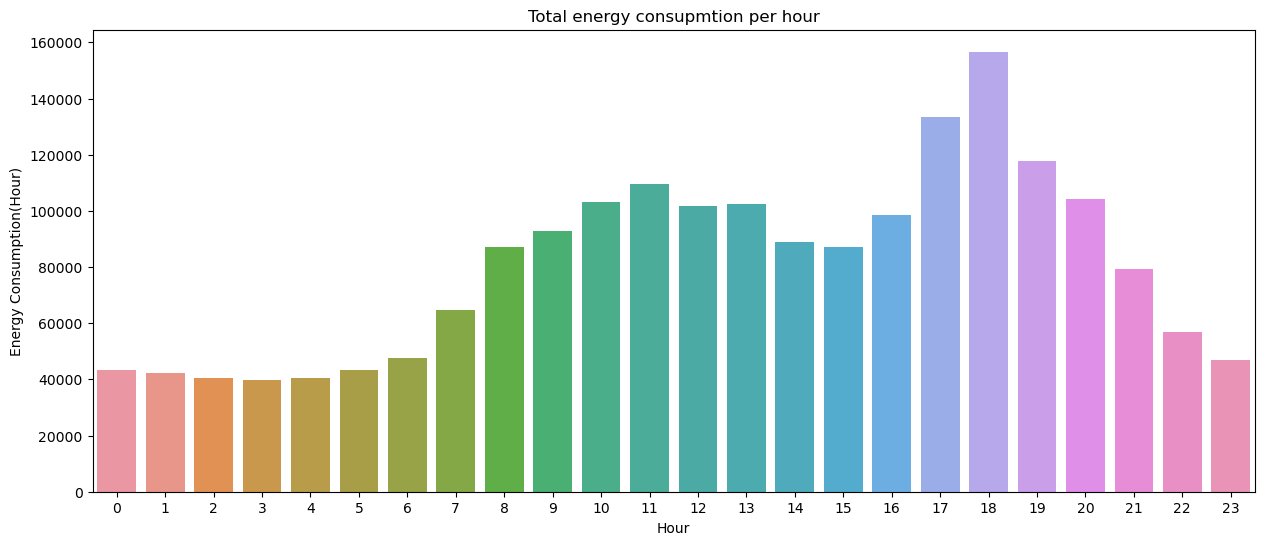

In [16]:
# Create a bar chart to show the total energy consumed by the appliance per hour
plt.subplots(figsize=(15,6))
hour_energy= sns.barplot(app_hour.hour,app_hour.Appliances)
plt.xlabel('Hour')
plt.ylabel('Energy Consumption(Hour)')
plt.title('Total energy consupmtion per hour')
plt.show()

### Observation:

Peak energy usage is between 5pm-8pm and 10am-1pm, with very little usage between midnight and early morning.

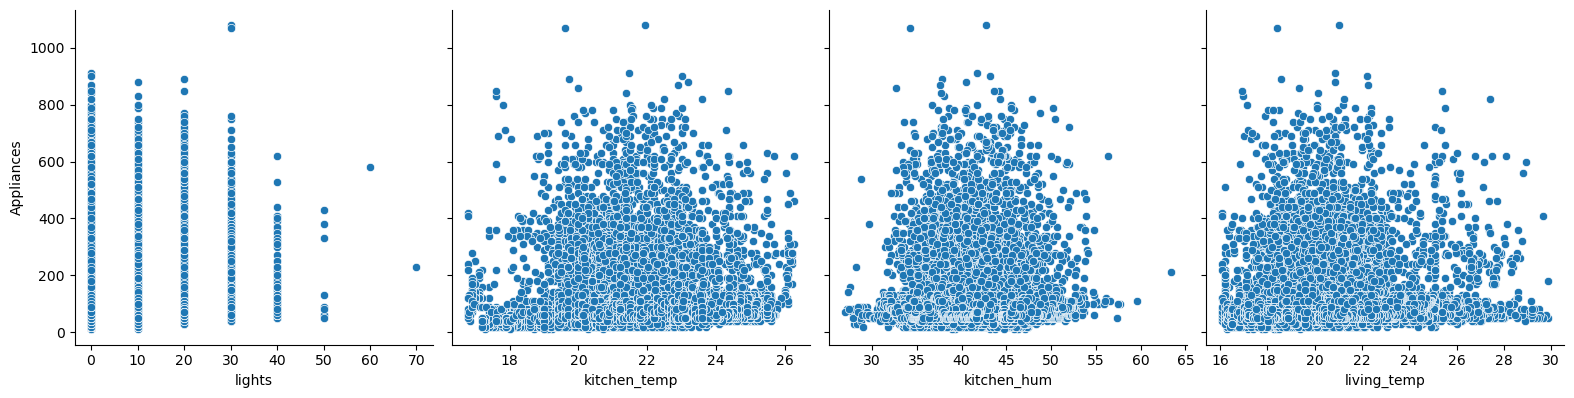

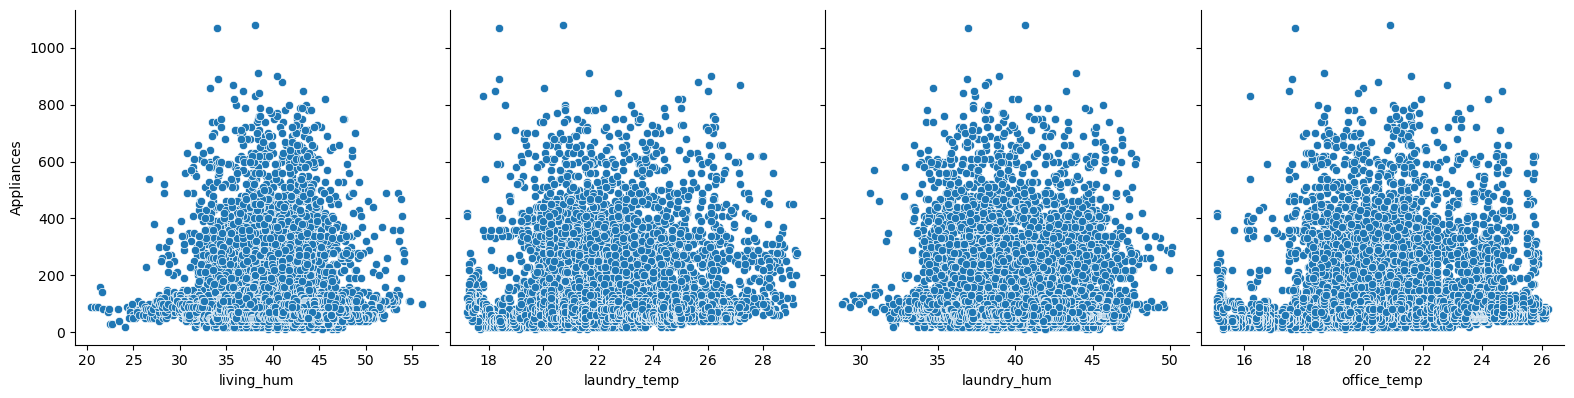

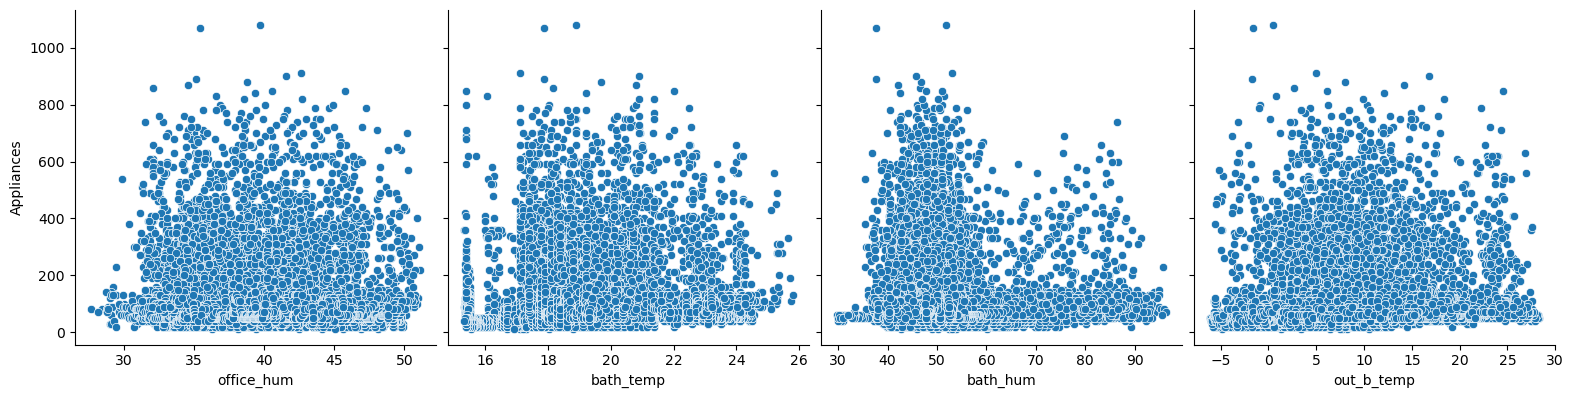

In [17]:
#function to plot scatter plot numeric variables with Appliances

def pp(w,x,y,z):
    sns.pairplot(data, x_vars=[w,x,y,z], y_vars='Appliances',height=4, aspect=1, kind='scatter')
    plt.show()

pp('lights', 'kitchen_temp', 'kitchen_hum' ,'living_temp')
pp('living_hum','laundry_temp','laundry_hum', 'office_temp')
pp( 'office_hum', 'bath_temp', 'bath_hum', 'out_b_temp')

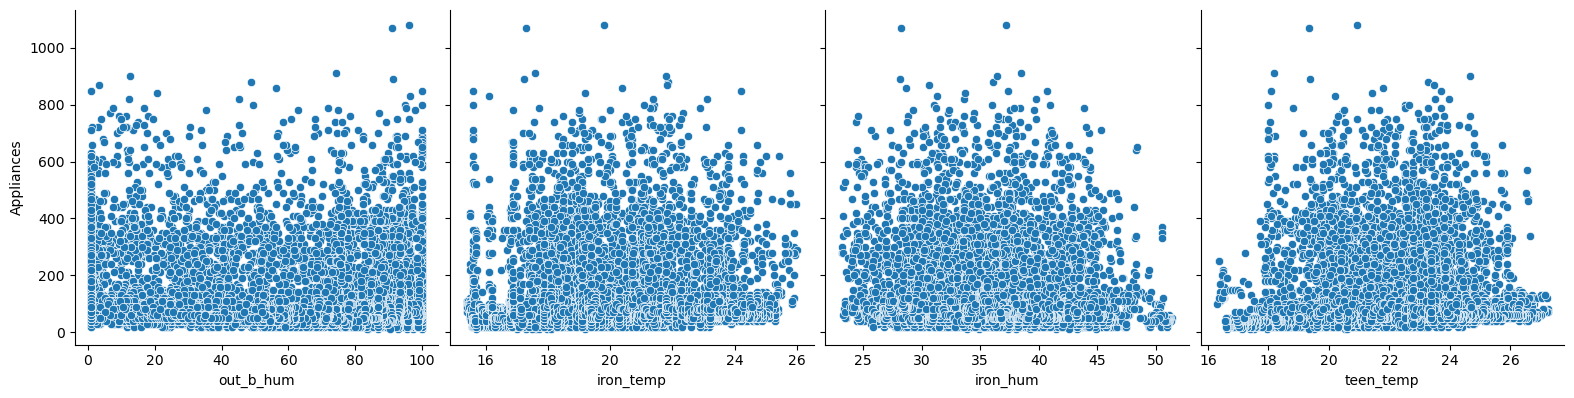

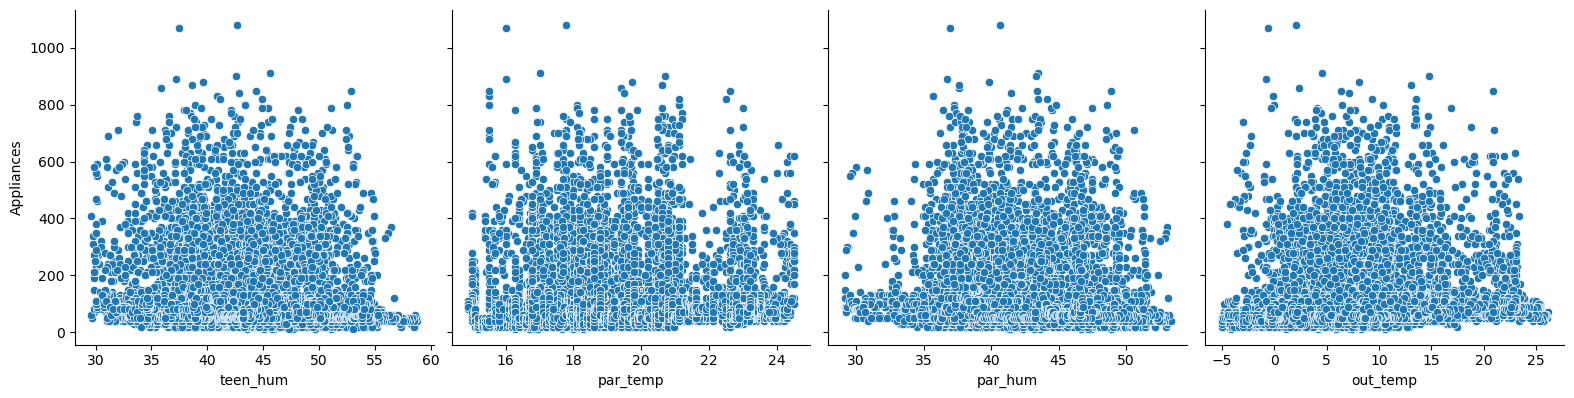

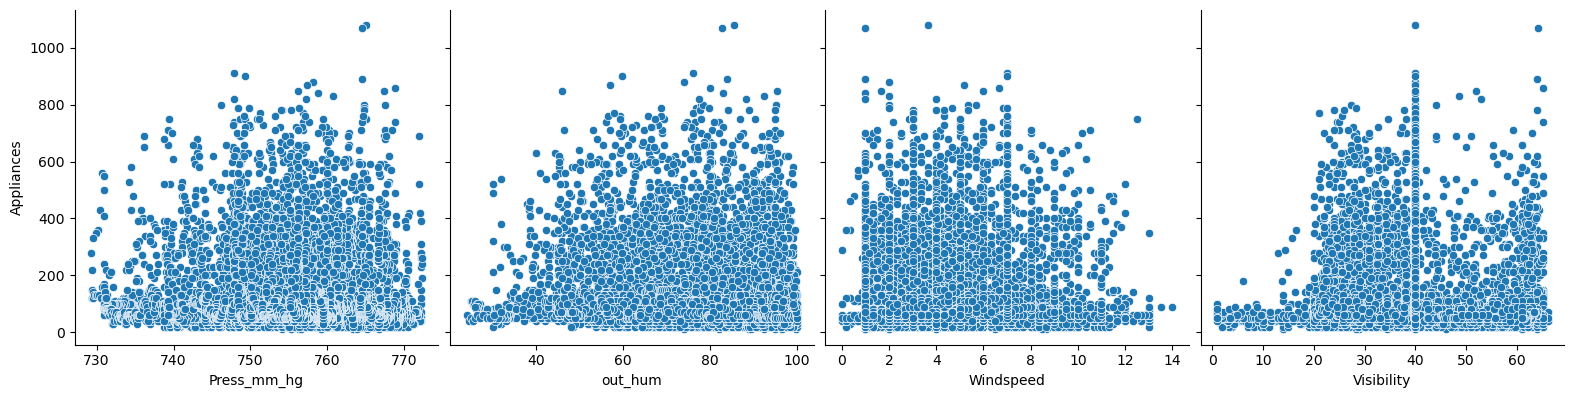

In [18]:
#function to plot scatter plot numeric variables with Appliances

def pp(w,x,y,z):
    sns.pairplot(data, x_vars=[w,x,y,z], y_vars='Appliances',height=4, aspect=1, kind='scatter')
    plt.show()

pp('out_b_hum','iron_temp','iron_hum','teen_temp')
pp('teen_hum','par_temp','par_hum','out_temp')
pp( 'Press_mm_hg','out_hum','Windspeed','Visibility')

In [19]:
# Compute pairwise correlation of columns
corr=data.corr()
corr

,Appliances,lights,kitchen_temp,kitchen_hum,living_temp,living_hum,laundry_temp,laundry_hum,office_temp,office_hum,...,par_temp,par_hum,out_temp,Press_mm_hg,out_hum,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
kitchen_temp,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
kitchen_hum,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
living_temp,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
living_hum,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
laundry_temp,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
laundry_hum,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
office_temp,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
office_hum,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


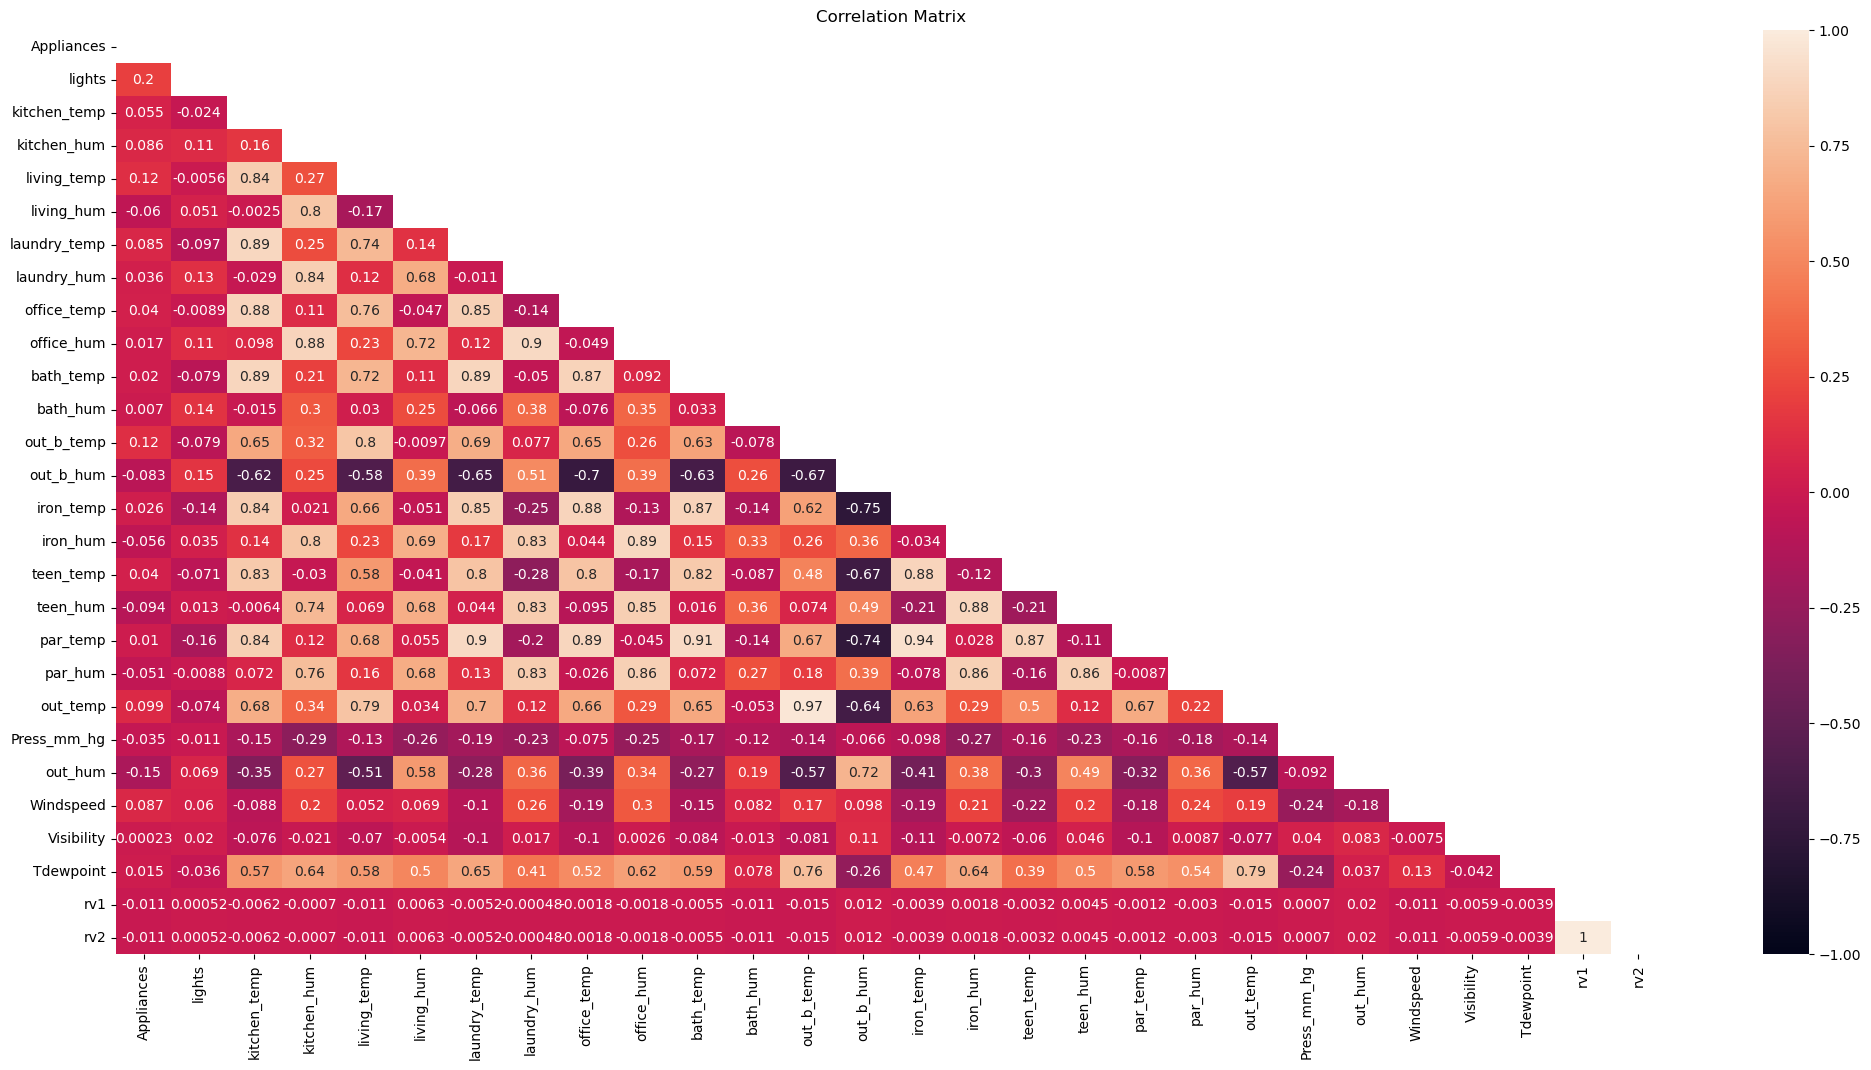

In [20]:
# Print heat map
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(25,12), dpi=100)
sns.heatmap(corr, annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Observation:
* We can see from the heat map that none of the other features have a very significant linear link with the target (the appliance).
* The features of temperature and humidity have a positive link among themselves but a very weak or negative correlation with one another.

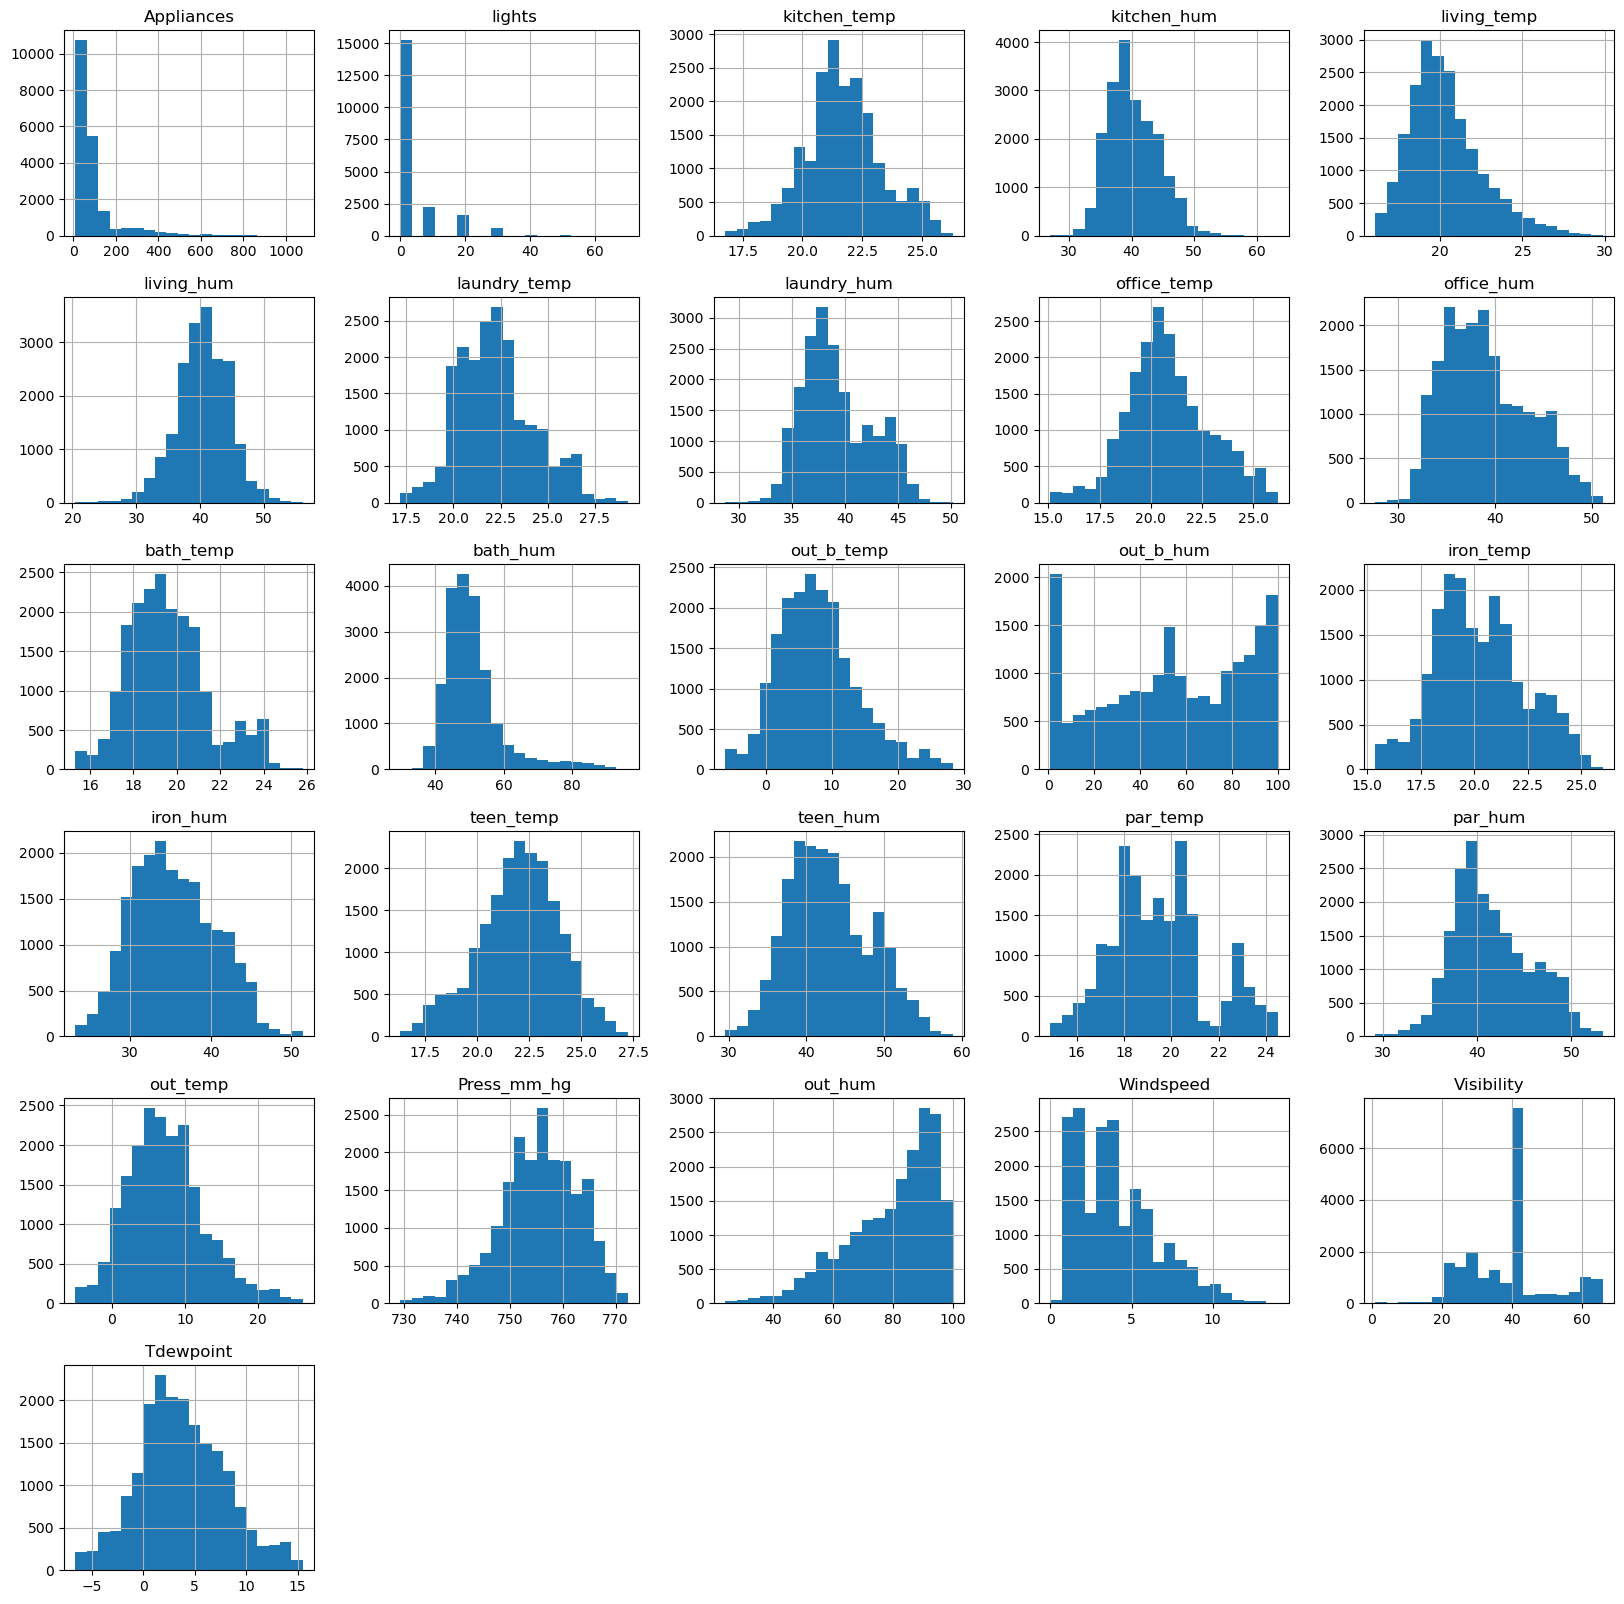

In [21]:
# drop rv1, rv2
data = data.drop(['rv1', 'rv2'], axis=1)
# print histogram
data.hist(figsize=(20,20),bins=20)
plt.show()

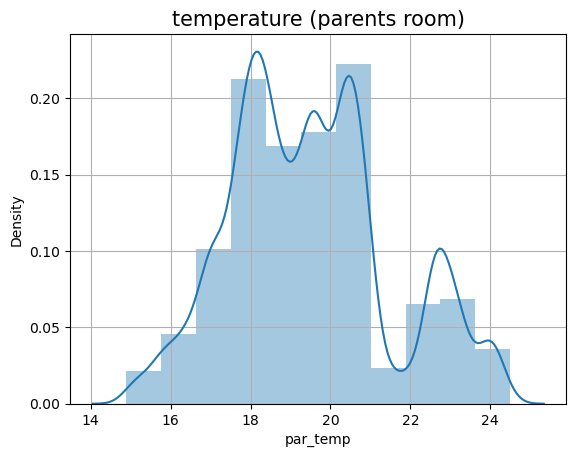

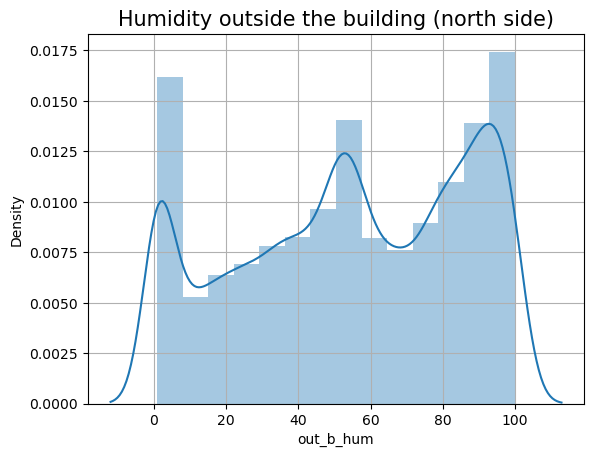

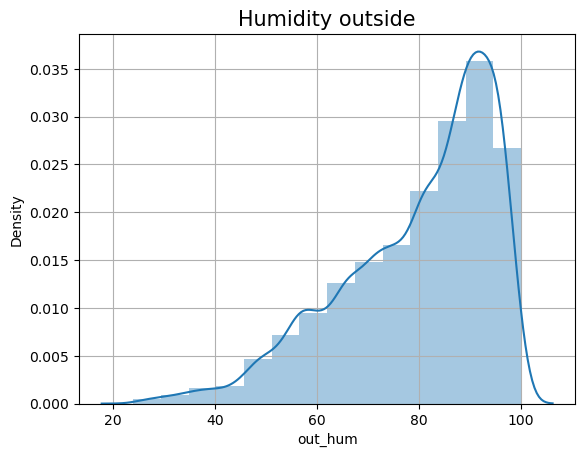

In [22]:
# Looking into par_temp in more detail:
sns.distplot(data.par_temp, bins = 11) 
plt.title('temperature (parents room)', fontsize = 15)
plt.grid()
plt.show()

# Looking into out_b_hum and out_hum
sns.distplot(data.out_b_hum, bins = 14) 
plt.title('Humidity outside the building (north side)', fontsize = 15)
plt.grid()
plt.show()
sns.distplot(data.out_hum, bins = 14) 
plt.title('Humidity outside', fontsize = 15)
plt.grid()
plt.show()

### Observation:
* With an exception of par_temp, all distributions of temperatures appear to follow the normal distribution. 
* With the exception of out_b_hum and out_hum, which are both measurements taken outside, all humidity distributions appear to match the normal distribution, so it makes reasonable that they don't.
* Since bath_hum is positively skewed (bathroom), higher humidity readings may occur when people are taking a shower or bath.

### 3. Implement prediction models

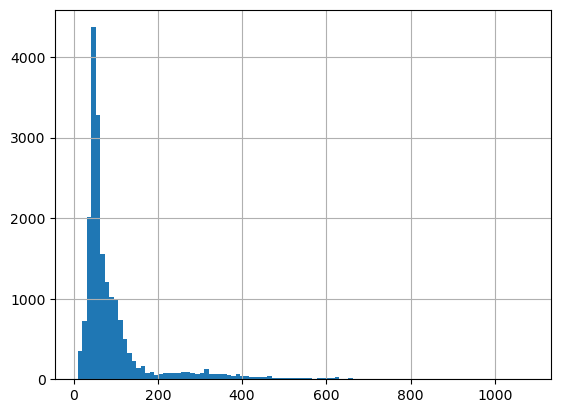

In [23]:
# target engineering
data['Appliances'].hist(bins=100)
plt.show()

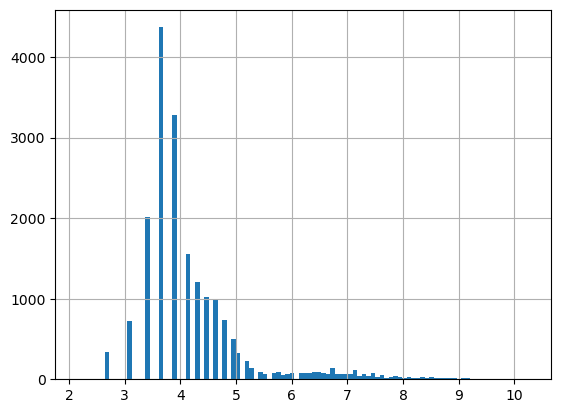

In [24]:
target = np.cbrt(data['Appliances']) # target transform
target.hist(bins=100)
plt.show()

Using target transform which might improve prediction.

In [25]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
# split data into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score
x= data.drop(['Appliances','date'],axis=1)
y= target
# 70% of the data is used for the training of the models and the rest is used for testing
x_train_1, x_test_1, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)


# standardize the range of functionality of the input dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_1)
x_test= scaler.transform(x_test_1)

* We can ignore the Date column because this is not a timeseries problem and our attention will be on forecasting appliance consumption.
* The original dataset is divided into a training set and a test set in a certain proportion (70% for training and 30% for testing).
* Set a random seed to ensure that the same random number is generated each time.
* Standardising input features.

#### select suitable prediction models
Improved Linear regression models:Ridge regression

Ensemble models：Random Forest Regressor 、Gradient Boosting Regressor

In [26]:
# three models
rd = Ridge(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)


### 4. Train prediction models

To evaluate the performance of our models, we randomly dividing our dataset into a training set and a testing set. The training set will be used to train our models, while the testing set will be used to evaluate their performance.

In addition, we will use 5-fold cross-validation to compare different models and tune their hyperparameters. This approach will help us select the optimal model and parameter combinations while ensuring that our models generalize well to new data.


In [27]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

# cross validation
folds=5

model_cv = GridSearchCV(estimator = rd, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [28]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-0.6286444092674502


In [29]:

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001935,0.000408,0.001443,0.002118,0.0001,{'alpha': 0.0001},-0.649675,-0.606484,-0.649994,-0.613529,...,-0.629460,0.017974,26,-0.620684,-0.634884,-0.620876,-0.635926,-0.626425,-0.627759,0.006583
1,0.001866,0.000448,0.000232,0.000136,0.001,{'alpha': 0.001},-0.649675,-0.606484,-0.649994,-0.613529,...,-0.629460,0.017974,25,-0.620684,-0.634884,-0.620876,-0.635926,-0.626425,-0.627759,0.006583
2,0.003221,0.001761,0.000153,0.000073,0.01,{'alpha': 0.01},-0.649675,-0.606484,-0.649993,-0.613529,...,-0.629460,0.017974,24,-0.620683,-0.634884,-0.620875,-0.635925,-0.626425,-0.627758,0.006583
3,0.003701,0.001867,0.000415,0.000314,0.05,{'alpha': 0.05},-0.649672,-0.606485,-0.649991,-0.613528,...,-0.629458,0.017973,23,-0.620681,-0.634882,-0.620873,-0.635924,-0.626423,-0.627757,0.006583
4,0.002447,0.001042,0.000230,0.000120,0.1,{'alpha': 0.1},-0.649669,-0.606486,-0.649988,-0.613526,...,-0.629455,0.017972,22,-0.620679,-0.634880,-0.620871,-0.635921,-0.626420,-0.627754,0.006583
5,0.002703,0.001545,0.000229,0.000105,0.2,{'alpha': 0.2},-0.649663,-0.606487,-0.649982,-0.613523,...,-0.629450,0.017969,21,-0.620675,-0.634876,-0.620866,-0.635917,-0.626415,-0.627750,0.006583
6,0.002328,0.000918,0.000248,0.000200,0.3,{'alpha': 0.3},-0.649656,-0.606489,-0.649975,-0.613520,...,-0.629445,0.017967,20,-0.620671,-0.634872,-0.620862,-0.635913,-0.626410,-0.627745,0.006583
7,0.002335,0.001104,0.000607,0.000887,0.4,{'alpha': 0.4},-0.649650,-0.606491,-0.649969,-0.613516,...,-0.629440,0.017964,19,-0.620667,-0.634867,-0.620858,-0.635908,-0.626405,-0.627741,0.006583
8,0.002856,0.001625,0.000243,0.000138,0.5,{'alpha': 0.5},-0.649644,-0.606493,-0.649963,-0.613513,...,-0.629435,0.017962,18,-0.620663,-0.634863,-0.620853,-0.635904,-0.626400,-0.627737,0.006583
9,0.002742,0.001112,0.000677,0.001023,0.6,{'alpha': 0.6},-0.649638,-0.606494,-0.649957,-0.613510,...,-0.629431,0.017960,17,-0.620658,-0.634859,-0.620849,-0.635900,-0.626395,-0.627732,0.006583


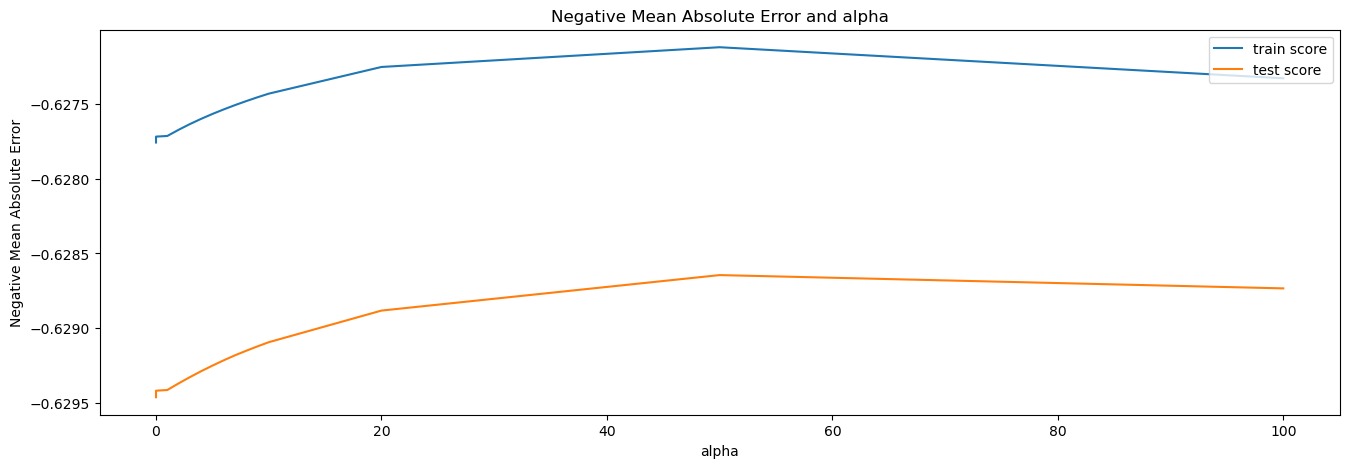

In [30]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### RandomForestRegressor

In [31]:
# RandomForestRegressor
params = {'n_estimators': [500, 600, 800, 1000],'max_depth':[8,15]}

# cross validation
folds = 5
model_cv_1 = GridSearchCV(estimator = rf, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)

model_cv_1.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 15],
                         'n_estimators': [500, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [32]:
print(model_cv_1.best_params_)
print(model_cv_1.best_score_)

{'max_depth': 15, 'n_estimators': 1000}
-0.4309385424798573


#### GradientBoostingRegressor

In [33]:
# GradientBoostingRegressor
params = {'max_depth': [1,2,3,4,5]}

# cross validation
folds = 5
model_cv_2 = GridSearchCV(estimator = gb, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_2.fit(x_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [34]:
print(model_cv_2.best_params_)
print(model_cv_2.best_score_)

{'max_depth': 5}
-0.5021931675561417


### 5. Test predictin models and show results

We will use two metrics to evaluate the performance of our models: R2 score and root mean square error (RMSE).

The R2 score measures how well the data fits the regression model. It quantifies the proportion of the variance in the dependent variable that is explained by the independent variables in the model. The value of R2 ranges from 0 to 1, with values closer to 1 indicating a better fit of the model to the observed data. We will use R2 to assess the goodness of fit of our models and compare their performance.

In addition, we will use RMSE to evaluate the quality of our predictions. RMSE measures the average deviation of the predicted values from the actual values. It is calculated by taking the square root of the mean squared error, which is the average of the squared differences between the predicted and actual values. The lower the RMSE, the better the model and its predictions. We will use RMSE to evaluate the accuracy of our models and compare their predictive performance.

By using these two metrics, we can assess both the goodness of fit and predictive accuracy of our models and select the best-performing model.

#### Ridge model

In [35]:
#final ridge model
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
ridge.coef_

array([ 0.20710564, -0.02234151,  0.65028761, -0.26237961, -0.47696043,
        0.52027538,  0.14712533, -0.09401485, -0.03548048, -0.02838001,
        0.036114  ,  0.40340044,  0.10801187, -0.04715877, -0.06688237,
        0.25871768, -0.34237333, -0.32483374, -0.08973837, -0.3466322 ,
        0.00426559, -0.07904827,  0.05993023,  0.01934835,  0.0902779 ])

In [36]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(x_train)
rd_score_train=metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
rd_score_train

0.2373502403176465

In [37]:
y_test_pred = ridge.predict(x_test)
rd_score_test=metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
rd_score_test

0.24509172193268025

In [38]:
from sklearn.metrics import mean_squared_error
print ('RMSE for Ridge Regression model is: \n',np.sqrt(mean_squared_error(y_test, y_test_pred)))
rmse_rd=np.sqrt(mean_squared_error(y_test, y_test_pred))

RMSE for Ridge Regression model is: 
 0.9455822408211441


####  Random Forest Regressor

In [39]:
#final RandomForestRegressor

rf = RandomForestRegressor(max_depth=15, n_estimators=1000,random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=1000, random_state=42)

In [40]:
#lets predict the R-squared value of test and train data

rf_train_pred = rf.predict(x_train)
rf_score_train=metrics.r2_score(y_true=y_train, y_pred=rf_train_pred)
rf_score_train

0.8885394276711132

In [41]:
rf_test_pred = rf.predict(x_test)
rf_score_test=(metrics.r2_score(y_true=y_test, y_pred=rf_test_pred))
rf_score_test

0.604569500998138

In [42]:
# rmse
print ('RMSE for RandomForest model is: \n', np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred)))
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred))

RMSE for RandomForest model is: 
 0.6843642183298144


#### Gradient Boosting Regressor

In [43]:
#final GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=5,random_state=42)
gb.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [44]:
#lets predict the R-squared value of test and train data

gb_train_pred = gb.predict(x_train)
gb_score_train= metrics.r2_score(y_true=y_train, y_pred=gb_train_pred)
gb_score_train


0.6259103716476316

In [45]:
gb_test_pred = gb.predict(x_test)
gb_score_test=metrics.r2_score(y_true=y_test, y_pred=gb_test_pred)
gb_score_test

0.4762330069386602

In [46]:
# rmse 
print ('RMSE for Gradient Boosting model is: \n', np.sqrt(metrics.mean_squared_error(y_test, gb_test_pred)))
rmse_gb= np.sqrt(metrics.mean_squared_error(y_test, gb_test_pred))

RMSE for Gradient Boosting model is: 
 0.787628234995931


### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

We compared three candidate models to determine the best performing model for a given dataset. We evaluated the models using R2 score and RMSE. The results indicated that Ridge Regression performed the worst, suggesting that linear regression models are not suitable for this dataset. However, Random Forest outperformed the other two models, achieving the highest R2 score and the lowest RMSE.

In addition, we interpreted the results of the Random Forest model to gain further insights into the relationship between predictor variables and the target variable. The variable importance plot generated by the model showed that 'out_hum','lights' were the most important predictors. This information can help in identifying which variables are most useful in predicting the target variable and understanding the relationship between the predictor variables and the target variable.

In conclusion, Random Forest regression was found to be the best performing model for this dataset, based on its high R2 score and low RMSE. The variable importance plot also confirmed the importance of certain predictor variables in predicting the target variable. These findings can help in developing better predictive models for similar datasets in the future.


#### Different model comparison


In [47]:
# show all results
models = [
          {'Name':'Ridge Regression',
          'Train R\u00B2 score': rd_score_train,
          'Test R\u00B2 score': rd_score_test,
          'RMSE test score': rmse_rd,
          },
          {'Name':'Random Forest Regressor',
          'Train R\u00B2 score': rf_score_train,
          'Test R\u00B2 score': rf_score_test,
          'RMSE test score': rmse_rf,
          },
          {'Name':'Gradient Boosting Regressor',
          'Train R\u00B2 score': gb_score_train,
          'Test R\u00B2 score': gb_score_test,
          'RMSE test score': rmse_gb},
          
         ]

models_com = pd.DataFrame(models)
models_com

,Name,Train R² score,Test R² score,RMSE test score
0,Ridge Regression,0.237350,0.245092,0.945582
1,Random Forest Regressor,0.888539,0.604570,0.684364
2,Gradient Boosting Regressor,0.625910,0.476233,0.787628


In [48]:
# Extracting the importance of features
rf_importances = rf.feature_importances_
gb_importances = gb.feature_importances_

In [49]:
# Get feature names and sort them
indices_rf = np.argsort(rf_importances)[::-1]
indices_gb = np.argsort(gb_importances)[::-1]
x_train_1 = pd.DataFrame(x_train_1)
features = x_train_1.columns

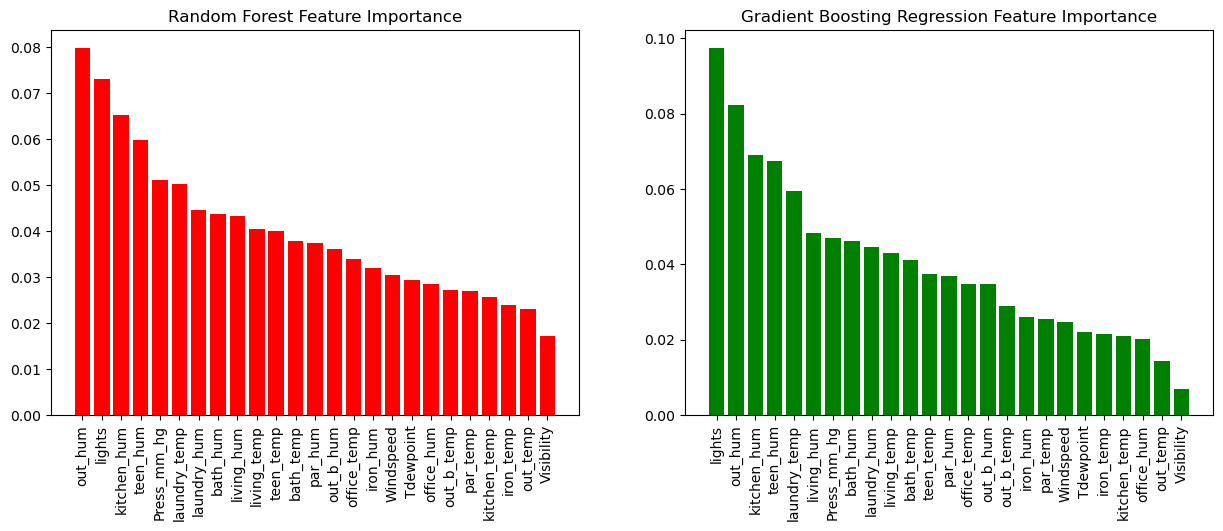

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# Plotting the importance of random forest features
axs[0].bar(range(x_train.shape[1]), rf_importances[indices_rf], color="r", align="center")
axs[0].set_xticks(range(x_train_1.shape[1]))
axs[0].set_xticklabels(features[indices_rf],rotation=90)
axs[0].set_title("Random Forest Feature Importance")
# Plotting the importance of GBM features
axs[1].bar(range(x_train.shape[1]), gb_importances[indices_gb], color="g", align="center")
axs[1].set_xticks(range(x_train_1.shape[1]))
axs[1].set_xticklabels(features[indices_gb],rotation=90)
axs[1].set_title("Gradient Boosting Regression Feature Importance")

plt.show()

#### Observation:
* 5 most important features for Random Forest are ['out_hum','lights','kitchen_humid','teen_hum','press_mm_hg']

* 5 most important features for GBM model are - ['lights','out_hum','kitchen_temp','teen_hum','laundry_temp']



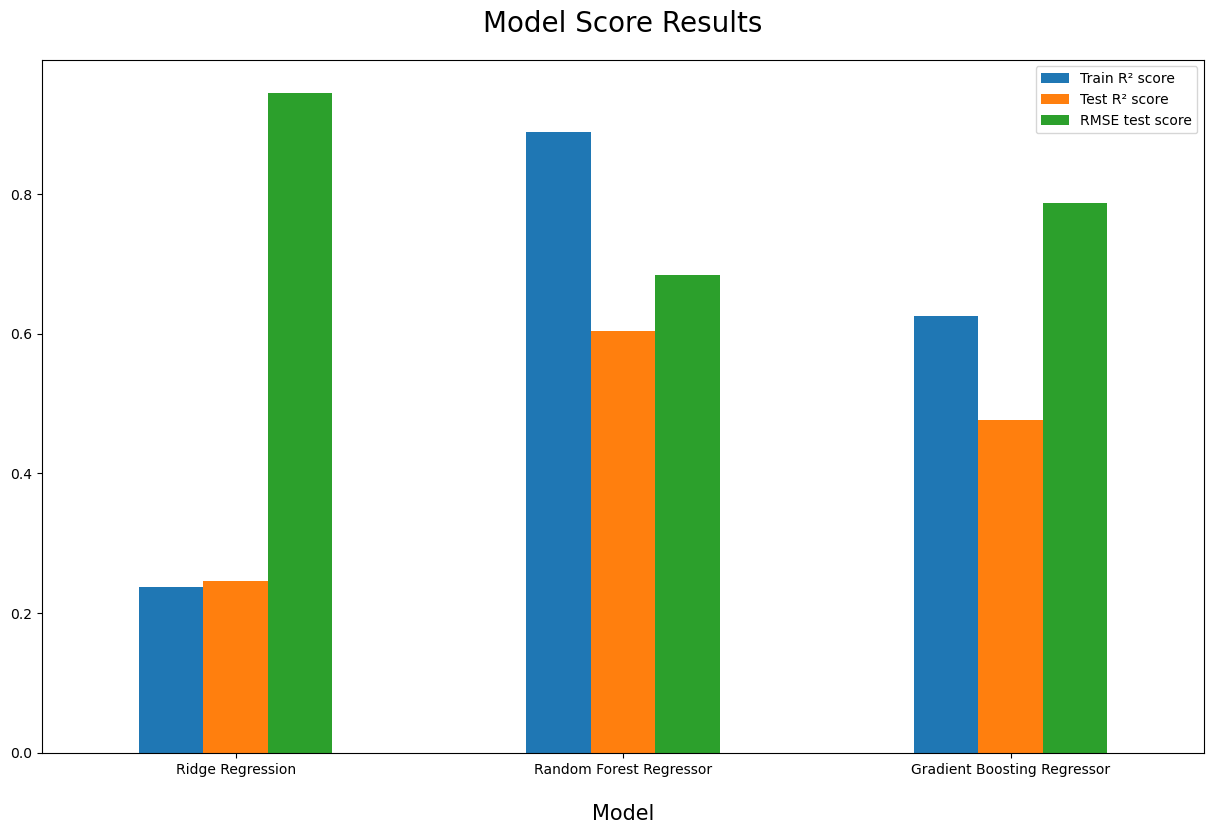

In [51]:
# plotting all model results
models_com.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Model Score Results', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()

#### Observation:
* The linear regression based Ridge model performed the worst, but this was to be expected as essentially none of the features had a strong correlation with the target.
* Of all the models tested,Random Forest Regression model performed best as it had the highest R^2 test score (nearly 90%) and the lowest root mean square error.

#### Choose the best performing model and show the final results¶

In [52]:
rf_test_pred

array([3.66332592, 4.71873868, 3.71430953, ..., 3.71874983, 4.70599566,
       3.88587103])

In [53]:
# choose the best performance model
model_final = [
          {'Name':'Random Forest Regressor',
          'Train R\u00B2 score': rf_score_train,
          'Test R\u00B2 score': rf_score_test,
          'RMSE test score': rmse_rf,}
         ]

model_final = pd.DataFrame( model_final)
model_final

,Name,Train R² score,Test R² score,RMSE test score
0,Random Forest Regressor,0.888539,0.60457,0.684364


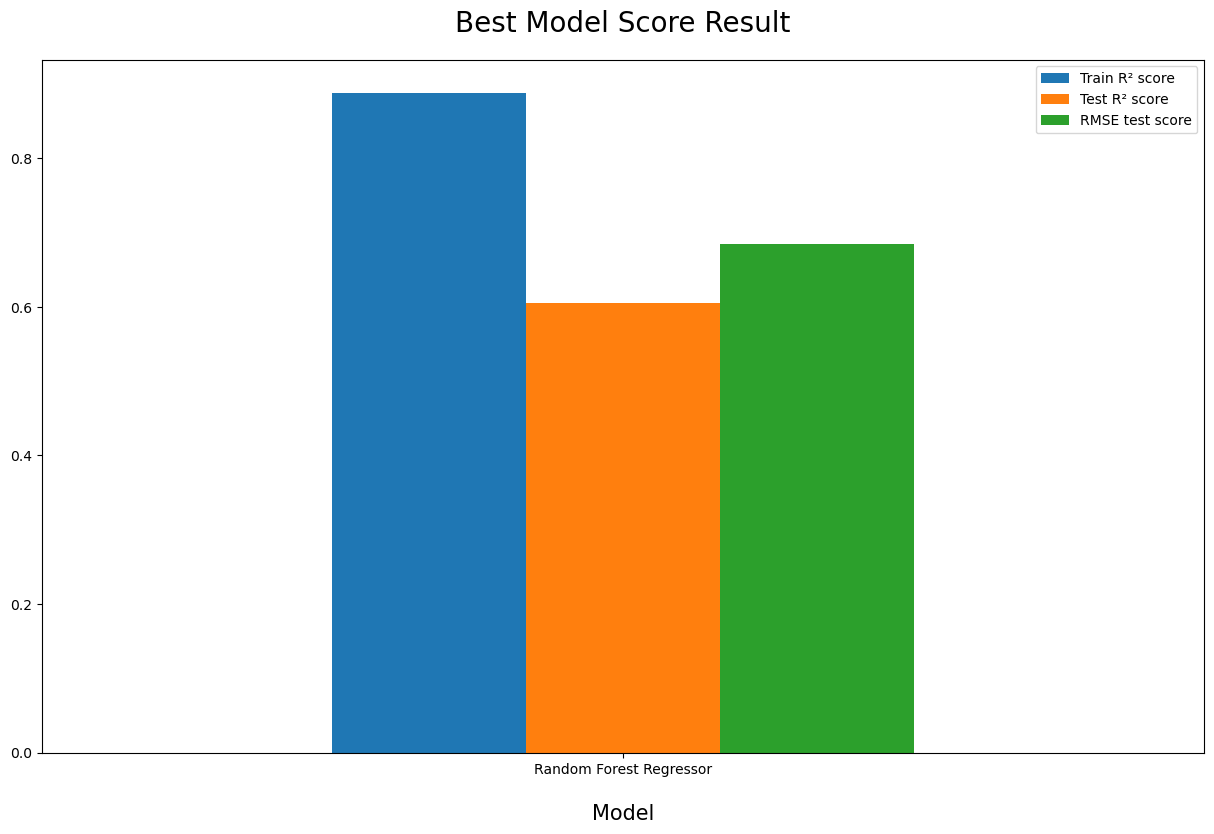

In [54]:
# plotting the random forest regressor results
model_final.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Best Model Score Result', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()

In [55]:
final_predictions = np.exp(rf_test_pred)
final_predictions

array([ 38.99080785, 112.02686201,  41.03024709, ...,  41.2128389 ,
       110.60835791,  48.70935128])

### 7. Reflect on what you have learned by completing this assignment

Completing this independent assignment on house energy prediction has deepened my understanding of machine learning techniques. While working on the project, I gained valuable experience in data pre-processing, where I utilized various techniques such as scaling, conversion, and missing value imputation. I also used visualization tools such as heatmaps, histograms to identify feature independence and detect outliers.

The assignment taught me that selecting the right set of features for the model is crucial in achieving accurate predictions. In addition, choosing the appropriate model and tuning hyperparameters through cross-validation were essential for improving model accuracy and performance. To evaluate model results, I utilized resources to select two model performance metrics, namely the R^2 score and root mean square error (RMSE), based on regression prediction model feature selection.

Throughout the assignment, I encountered several challenges that required me to consult the course materials and workshops. This experience helped me to overcome these obstacles and gain a better understanding of the key concepts. However, one area I identified for improvement in my work was the selection of features for the model to improve the accuracy and reliability of my models.


### 8. References

Rebala. (2019). An Introduction to Machine Learning [electronic resource] (Ravi & S. Churiwala, Eds.; 1st ed. 2019.). Springer International Publishing ; Imprint Springer. https://doi.org/10.1007/978-3-030-15729-6

https://bradleyboehmke.github.io/HOML/engineering.html

https://bookdown.org/max/FES/measuring-performance.html